In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import os, shutil
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner import HyperModel
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

C:\Users\MY PC\AppData\Local\Temp\ipykernel_18668\1229355946.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [2]:
BASE_DIR = r"C:\Users\MY PC\Documents\beginner_datascience\hero_identifier"

PATH_INDEX = os.path.join(BASE_DIR, "index.csv")
PATH_TEST = os.path.join(BASE_DIR, "test.csv")
PATH_METADATA = os.path.join(BASE_DIR, "metadata.csv")
import chardet

with open('metadata.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result)
# result['encoding'] will tell you the likely encoding

df_metadata = pd.read_csv('metadata.csv', encoding=result['encoding'])


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [3]:
df_metadata

,class_id,lego_ids,lego_names,minifigure_name
0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
1,2,[76115],['Spider Mech vs. Venom'],VENOM
2,3,[76115],['Spider Mech vs. Venom'],AUNT MAY
3,4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
4,5,[75208],"[""Yoda's Hut""]",YODA
5,6,[75208],"[""Yoda's Hut""]",LUKE SKYWALKER
6,7,[75208],"[""Yoda's Hut""]",R2-D2
7,8,[75199],"[""General Grievous' Combat Speeder""]",MACE WINDU
8,9,[75199],"[""General Grievous' Combat Speeder""]",GENERAL GRIEVOUS
9,10,[75264],"[""Kylo Ren's Shuttle Microfighter""]",KYLO REN


In [4]:
from sklearn import model_selection as sk_model_selection

# Read information about dataset
df = pd.read_csv(PATH_INDEX)

In [5]:
df

,path,class_id
0,marvel/0001/001.jpg,1
1,marvel/0001/002.jpg,1
2,marvel/0001/003.jpg,1
3,marvel/0001/004.jpg,1
4,marvel/0001/005.jpg,1
...,...,...
366,star-wars/0017/006.jpg,38
367,star-wars/0017/007.jpg,38
368,star-wars/0017/008.jpg,38
369,star-wars/0017/009.jpg,38


In [6]:
num_classes =df['class_id'].nunique()

In [7]:
df["path"] = df["path"].apply(lambda x: os.path.join(BASE_DIR, *x.split("/")))

In [8]:
df

,path,class_id
0,C:\Users\MY PC\Documents\beginner_datascience\...,1
1,C:\Users\MY PC\Documents\beginner_datascience\...,1
2,C:\Users\MY PC\Documents\beginner_datascience\...,1
3,C:\Users\MY PC\Documents\beginner_datascience\...,1
4,C:\Users\MY PC\Documents\beginner_datascience\...,1
...,...,...
366,C:\Users\MY PC\Documents\beginner_datascience\...,38
367,C:\Users\MY PC\Documents\beginner_datascience\...,38
368,C:\Users\MY PC\Documents\beginner_datascience\...,38
369,C:\Users\MY PC\Documents\beginner_datascience\...,38


In [9]:
df_index = pd.merge(df, df_metadata[['class_id', 'minifigure_name']], on='class_id')

df_index

,path,class_id,minifigure_name
0,C:\Users\MY PC\Documents\beginner_datascience\...,1,SPIDER-MAN
1,C:\Users\MY PC\Documents\beginner_datascience\...,1,SPIDER-MAN
2,C:\Users\MY PC\Documents\beginner_datascience\...,1,SPIDER-MAN
3,C:\Users\MY PC\Documents\beginner_datascience\...,1,SPIDER-MAN
4,C:\Users\MY PC\Documents\beginner_datascience\...,1,SPIDER-MAN
...,...,...,...
366,C:\Users\MY PC\Documents\beginner_datascience\...,38,BOBA FETT
367,C:\Users\MY PC\Documents\beginner_datascience\...,38,BOBA FETT
368,C:\Users\MY PC\Documents\beginner_datascience\...,38,BOBA FETT
369,C:\Users\MY PC\Documents\beginner_datascience\...,38,BOBA FETT


In [10]:
df_index['minifigure_name'].unique()

array(['SPIDER-MAN', 'VENOM', 'AUNT MAY', 'GHOST SPIDER', 'YODA',
       'LUKE SKYWALKER', 'R2-D2', 'MACE WINDU', 'GENERAL GRIEVOUS',
       'KYLO REN', 'THE MANDALORIAN', 'CARA DUNE', 'KLATOOINIAN RAIDER 1',
       'KLATOOINIAN RAIDER 2', 'MYSTERIO', 'FIREFIGHTER', 'HARRY POTTER',
       'RON WEASLEY', 'BLACK WIDOW', 'YELENA BELOVA', 'TASKMASTER',
       'CAPTAIN AMERICA', 'OUTRIDER 1', 'OUTRIDER 2', 'OWEN GRADY',
       'TRACKER TRAQUEUR RASTREADOR', 'IRON MAN MK 1', 'IRON MAN MK 5',
       'IRON MAN MK 41', 'IRON MAN MK 50', 'JANNAH', 'HAN SOLO',
       'DARTH VADER', 'ANAKIN SKYWALKER', 'EMPEROR PALPATINE',
       'OBI-WAN KENOBI', 'BOBA FETT'], dtype=object)

In [11]:
df_index['class_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

In [12]:
df['path'][0]

'C:\\Users\\MY PC\\Documents\\beginner_datascience\\hero_identifier\\marvel\\0001\\001.jpg'

In [13]:
df_test=pd.read_csv(PATH_TEST)
df_test

,path,class_id
0,test/001.jpg,32
1,test/002.jpg,32
2,test/003.jpg,32
3,test/004.jpg,32
4,test/005.jpg,1
...,...,...
74,test/075.jpg,37
75,test/076.jpg,37
76,test/077.jpg,38
77,test/078.jpg,38


In [14]:
df_test["path"] = df_test["path"].apply(lambda x: os.path.join(BASE_DIR, *x.split("/")))

In [15]:
df_test

,path,class_id
0,C:\Users\MY PC\Documents\beginner_datascience\...,32
1,C:\Users\MY PC\Documents\beginner_datascience\...,32
2,C:\Users\MY PC\Documents\beginner_datascience\...,32
3,C:\Users\MY PC\Documents\beginner_datascience\...,32
4,C:\Users\MY PC\Documents\beginner_datascience\...,1
...,...,...
74,C:\Users\MY PC\Documents\beginner_datascience\...,37
75,C:\Users\MY PC\Documents\beginner_datascience\...,37
76,C:\Users\MY PC\Documents\beginner_datascience\...,38
77,C:\Users\MY PC\Documents\beginner_datascience\...,38


In [16]:
df_test_index = pd.merge(df_test, df_metadata[['class_id', 'minifigure_name']], on='class_id')

df_test_index

,path,class_id,minifigure_name
0,C:\Users\MY PC\Documents\beginner_datascience\...,32,JANNAH
1,C:\Users\MY PC\Documents\beginner_datascience\...,32,JANNAH
2,C:\Users\MY PC\Documents\beginner_datascience\...,32,JANNAH
3,C:\Users\MY PC\Documents\beginner_datascience\...,32,JANNAH
4,C:\Users\MY PC\Documents\beginner_datascience\...,1,SPIDER-MAN
...,...,...,...
74,C:\Users\MY PC\Documents\beginner_datascience\...,37,OBI-WAN KENOBI
75,C:\Users\MY PC\Documents\beginner_datascience\...,37,OBI-WAN KENOBI
76,C:\Users\MY PC\Documents\beginner_datascience\...,38,BOBA FETT
77,C:\Users\MY PC\Documents\beginner_datascience\...,38,BOBA FETT


In [17]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
# Split into train (60%), val (25%), test (15%)
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['class_id'], random_state=42)
print("Train:", len(train_df))
print("Val:", len(val_df))

Train: 296
Val: 75


In [18]:
train_df['class_id'] = train_df['class_id'] - 1
val_df['class_id'] = val_df['class_id'] - 1
df_test['class_id'] = df_test['class_id'] - 1

In [19]:
img= val_df['path'].iloc[0]
if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")
else:
    print('yes')

yes


In [20]:
from tensorflow.keras.applications import MobileNetV2
mobilenet_model=MobileNetV2(
    input_shape=(224, 224, 3),
    weights="imagenet",
    include_top=False
)

print(type(mobilenet_model))
mobilenet_model.summary()

<class 'keras.src.models.functional.Functional'>


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [21]:
for layer in mobilenet_model.layers:
    layer.trainable = False

In [22]:
# Build your model
model = models.Sequential([
    mobilenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])


In [23]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,426,854 (9.26 MB)

 Trainable params: 168,870 (659.65 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:
import albumentations as A

def get_train_transforms():
    return A.Compose([
        A.ShiftScaleRotate(
            p=1.0, shift_limit=(-0.1, 0.1), 
            scale_limit=(-0.2, 0.2), 
            rotate_limit=(-30, 30), 
            border_mode=4
        ),
        A.CoarseDropout(
            p=0.5, max_holes=100, 
            max_height=50, max_width=50, 
            min_holes=10, min_height=10, min_width=10,
            fill_value=0,
        ),
        A.CoarseDropout(
            p=0.5, max_holes=100, 
            max_height=50, max_width=50, 
            min_holes=10, min_height=10, min_width=10,
            fill_value=255,
        ),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(
            brightness_limit=0.4,    
            contrast_limit=0.3,     
            p=0.5
        ),
        A.Blur(p=0.25),
    ], p=1.0)


C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
from tensorflow.keras.utils import Sequence

In [27]:
import matplotlib.pyplot as plt
import cv2
class AlbumentationsDataGenerator(Sequence):
    def __init__(self, dataframe, x_col, y_col, batch_size, img_size,
                 augmentations=None, preprocess=None, shuffle=True):
        """
        dataframe: Pandas dataframe containing image paths and labels
        x_col: column name for image paths
        y_col: column name for labels
        batch_size: number of images per batch
        img_size: (H, W) tuple for resizing
        augmentations: Albumentations Compose transform
        preprocess: Preprocessing function (e.g. tf.keras.applications.mobilenet_v2.preprocess_input)
        shuffle: whether to shuffle dataset each epoch
        """
        self.df = dataframe.reset_index(drop=True)
        self.x_col = x_col
        self.y_col = y_col
        self.batch_size = batch_size
        self.img_size = img_size
        self.augment = augmentations
        self.preprocess = preprocess
        self.shuffle = shuffle
        self.indices = np.arange(len(self.df))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = []
        batch_y = []

        for i in batch_indices:
            img_path = self.df.loc[i, self.x_col]
            label = self.df.loc[i, self.y_col]
            
            if not os.path.exists(img_path):
                raise FileNotFoundError(f"Image not found at {img_path}")

            # Load image with cv2
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, self.img_size)

            # Apply Albumentations
            if self.augment:
                img = self.augment(image=img)["image"]

            # Apply preprocess_input (e.g. MobileNetV2 preprocessing)
            if self.preprocess:
                img = self.preprocess(img)

            batch_x.append(img)
            batch_y.append(label)

        return np.array(batch_x, dtype="float32"), np.array(batch_y, dtype="int32")

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)




In [28]:
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# # Generate batches of tensor image data with real-time data augmentation.

# train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
# valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
# test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

# # Training generator
# train_batches = train_gen.flow_from_dataframe(
#     dataframe=train_df,
#     x_col="path",         # column that contains the full image path
#     y_col="class_id",     # column that contains the labels
#     target_size=(224, 224),
#     class_mode="sparse",
#     batch_size=4,
#     shuffle=True
# )

# # Validation generator
# val_batches = valid_gen.flow_from_dataframe(
#     dataframe=val_df,
#     x_col="path",
#     y_col="class_id",
#     target_size=(224, 224),
#     class_mode="sparse",
#     batch_size=4,
#     shuffle=False
# )

# # Test generator
# test_batches = test_gen.flow_from_dataframe(
#     dataframe=test_df,
#     x_col="path",
#     y_col="class_id",
#     target_size=(224, 224),
#     class_mode="sparse",
#     batch_size=4,
#     shuffle=False
# )

In [29]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# Training generator (with Albumentations)
train_batches = AlbumentationsDataGenerator(
    dataframe=train_df,
    x_col="path",
    y_col="class_id",
    batch_size=4,
    img_size=(224,224),
    augmentations=get_train_transforms(),
    preprocess=preprocess_input,
    shuffle=False
)

# Validation generator (no augmentations)
val_batches = AlbumentationsDataGenerator(
    dataframe=val_df,
    x_col="path",
    y_col="class_id",
    batch_size=4,
    img_size=(224,224),
    preprocess=preprocess_input,
    augmentations=None,
    shuffle=False
                 
)

# Test generator (no augmentations)
test_batches = AlbumentationsDataGenerator(
    dataframe=df_test,
    x_col="path",
    y_col="class_id",
    batch_size=4,
    img_size=(224,224),
    augmentations=None,
    preprocess=preprocess_input
)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
C:\Users\MY PC\AppData\Local\Temp\ipykernel_18668\104768529.py:11: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(
C:\Users\MY PC\AppData\Local\Temp\ipykernel_18668\104768529.py:17: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


In [30]:
epochs = 50

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

history=model.fit(train_batches, validation_data=val_batches,
          callbacks=[early_stopping],
          epochs=epochs, verbose=2)

Epoch 1/50


C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 - 14s - 193ms/step - accuracy: 0.0405 - loss: 3.8085 - val_accuracy: 0.1333 - val_loss: 3.5134
Epoch 2/50
74/74 - 12s - 166ms/step - accuracy: 0.1182 - loss: 3.3814 - val_accuracy: 0.1067 - val_loss: 3.3338
Epoch 3/50
74/74 - 18s - 238ms/step - accuracy: 0.1453 - loss: 3.1234 - val_accuracy: 0.2267 - val_loss: 2.9479
Epoch 4/50
74/74 - 16s - 218ms/step - accuracy: 0.2061 - loss: 2.8482 - val_accuracy: 0.3333 - val_loss: 2.6879
Epoch 5/50
74/74 - 16s - 219ms/step - accuracy: 0.2669 - loss: 2.6729 - val_accuracy: 0.3600 - val_loss: 2.4313
Epoch 6/50
74/74 - 16s - 213ms/step - accuracy: 0.3412 - loss: 2.2838 - val_accuracy: 0.4400 - val_loss: 2.1413
Epoch 7/50
74/74 - 16s - 217ms/step - accuracy: 0.4392 - loss: 2.0023 - val_accuracy: 0.4133 - val_loss: 2.1025
Epoch 8/50
74/74 - 17s - 226ms/step - accuracy: 0.4595 - loss: 1.8761 - val_accuracy: 0.4400 - val_loss: 1.8809
Epoch 9/50
74/74 - 16s - 219ms/step - accuracy: 0.5270 - loss: 1.7166 - val_accuracy: 0.4667 - val_loss: 1.7117
Epo

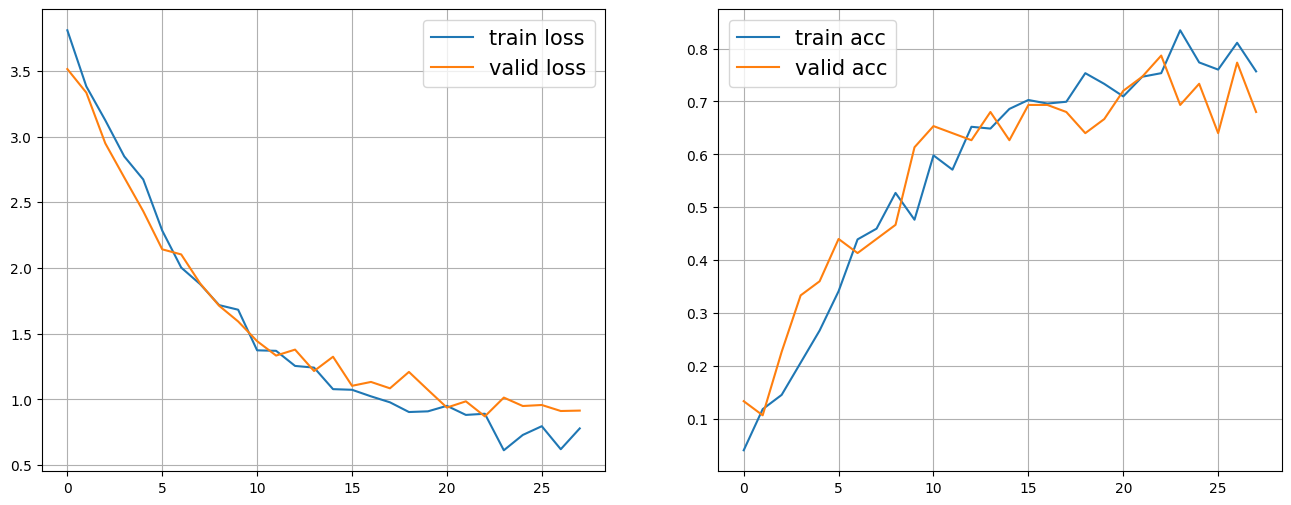

In [31]:
# plot loss and acc
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend(fontsize=15);

In [32]:
model.evaluate(test_batches, verbose=2)

20/20 - 2s - 90ms/step - accuracy: 0.7215 - loss: 0.9492


[0.9491565823554993, 0.7215189933776855]

In [36]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Show all rows (optional)
pd.set_option('display.max_rows', None)

# Set column width (optional, useful for very long names)
pd.set_option('display.max_colwidth', None)



# Your list of minifigure names
characters = ['SPIDER-MAN', 'VENOM', 'AUNT MAY', 'GHOST SPIDER', 'YODA',
              'LUKE SKYWALKER', 'R2-D2', 'MACE WINDU', 'GENERAL GRIEVOUS',
              'KYLO REN', 'THE MANDALORIAN', 'CARA DUNE', 'KLATOOINIAN RAIDER 1',
              'KLATOOINIAN RAIDER 2', 'MYSTERIO', 'FIREFIGHTER', 'HARRY POTTER',
              'RON WEASLEY', 'BLACK WIDOW', 'YELENA BELOVA', 'TASKMASTER',
              'CAPTAIN AMERICA', 'OUTRIDER 1', 'OUTRIDER 2', 'OWEN GRADY',
              'TRACKER TRAQUEUR RASTREADOR', 'IRON MAN MK 1', 'IRON MAN MK 5',
              'IRON MAN MK 41', 'IRON MAN MK 50', 'JANNAH', 'HAN SOLO',
              'DARTH VADER', 'ANAKIN SKYWALKER', 'EMPEROR PALPATINE',
              'OBI-WAN KENOBI', 'BOBA FETT']

# Mapping ID <-> name
id_to_name = {i: name for i, name in enumerate(characters)}

# Collect actual labels
y_true = []
for i in range(len(test_batches)):
    batch_x, batch_y = test_batches[i]
    y_true.extend(batch_y)
y_true = np.array(y_true)

# Model predictions
predictions = model.predict(test_batches)
y_pred = np.argmax(predictions, axis=1)

# Construct table
df_pred = pd.DataFrame({
    'pred_class_id': y_pred,    # predicted
    'actual_class_id': y_true   # actual
})

# Map IDs to minifigure names
df_pred['pred_name'] = df_pred['pred_class_id'].map(id_to_name)
df_pred['actual_name'] = df_pred['actual_class_id'].map(id_to_name)

# Optional: add correctness column
df_pred['correct'] = df_pred['pred_class_id'] == df_pred['actual_class_id']

print(df_pred)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
    pred_class_id  actual_class_id                    pred_name  \
0              29               29               IRON MAN MK 50   
1              37               37                          NaN   
2               3                3                 GHOST SPIDER   
3              30                0                       JANNAH   
4               6                6                        R2-D2   
5              30               28                       JANNAH   
6              21               21              CAPTAIN AMERICA   
7              36               36                    BOBA FETT   
8              31               31                     HAN SOLO   
9               9                1                     KYLO REN   
10             30               30                       JANNAH   
11             30               28                       JANNAH   
12              6                6                        R2-D2   
13             25     

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


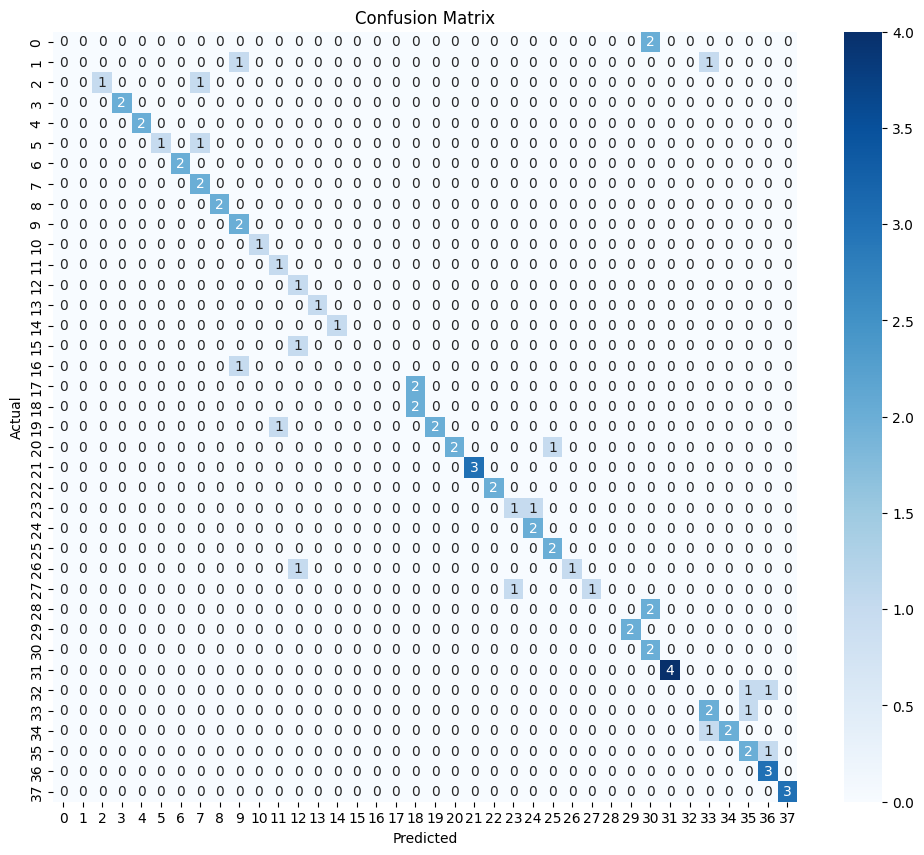

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         2
           8       1.00      1.00      1.00         2
           9       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         1
          11       0.50      1.00      0.67         1
          12       0.33      1.00      0.50         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# True labels
y_true = []
for i in range(len(test_batches)):
    batch_x, batch_y = test_batches[i]
    y_true.extend(batch_y)
y_true = np.array(y_true)

# Predicted labels
predictions = model.predict(test_batches)
y_pred = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true, y_pred)
print(report)

In [38]:
from tensorflow.keras.applications import ResNet50
ResNet50_model=ResNet50(
    input_shape=(224, 224, 3),
    weights="imagenet",
    include_top=False
)

print(type(ResNet50_model))
ResNet50_model.summary()

<class 'keras.src.models.functional.Functional'>


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [39]:
for layer in mobilenet_model.layers:
    layer.trainable = False

In [40]:
model = models.Sequential([
    mobilenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,426,854 (9.26 MB)

 Trainable params: 168,870 (659.65 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [41]:
from tensorflow.keras.applications.resnet50 import preprocess_input
# Training generator (with Albumentations)
train_batches = AlbumentationsDataGenerator(
    dataframe=train_df,
    x_col="path",
    y_col="class_id",
    batch_size=4,
    img_size=(224,224),
    augmentations=get_train_transforms(),
    preprocess=preprocess_input,
    shuffle=False
)

# Validation generator (no augmentations)
val_batches = AlbumentationsDataGenerator(
    dataframe=val_df,
    x_col="path",
    y_col="class_id",
    batch_size=4,
    img_size=(224,224),
    preprocess=preprocess_input,
    augmentations=None,
    shuffle=False
                 
)

# Test generator (no augmentations)
test_batches = AlbumentationsDataGenerator(
    dataframe=df_test,
    x_col="path",
    y_col="class_id",
    batch_size=4,
    img_size=(224,224),
    augmentations=None,
    preprocess=preprocess_input
)

C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
C:\Users\MY PC\AppData\Local\Temp\ipykernel_18668\104768529.py:11: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(
C:\Users\MY PC\AppData\Local\Temp\ipykernel_18668\104768529.py:17: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


In [42]:
epochs = 50

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

history=model.fit(train_batches, validation_data=val_batches,
          callbacks=[early_stopping],
          epochs=epochs, verbose=2)

Epoch 1/50


C:\Users\MY PC\Desktop\bertkeras\sumvenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 - 13s - 179ms/step - accuracy: 0.0338 - loss: 3.9671 - val_accuracy: 0.0400 - val_loss: 3.5915
Epoch 2/50
74/74 - 6s - 83ms/step - accuracy: 0.0507 - loss: 3.6372 - val_accuracy: 0.0667 - val_loss: 3.5835
Epoch 3/50
74/74 - 6s - 82ms/step - accuracy: 0.0405 - loss: 3.6115 - val_accuracy: 0.1200 - val_loss: 3.5435
Epoch 4/50
74/74 - 6s - 82ms/step - accuracy: 0.0507 - loss: 3.5647 - val_accuracy: 0.0533 - val_loss: 3.5643
Epoch 5/50
74/74 - 8s - 106ms/step - accuracy: 0.0405 - loss: 3.5342 - val_accuracy: 0.0400 - val_loss: 3.5246
Epoch 6/50
74/74 - 17s - 223ms/step - accuracy: 0.0845 - loss: 3.5250 - val_accuracy: 0.1467 - val_loss: 3.3764
Epoch 7/50
74/74 - 18s - 244ms/step - accuracy: 0.0574 - loss: 3.4660 - val_accuracy: 0.0933 - val_loss: 3.3658
Epoch 8/50
74/74 - 17s - 234ms/step - accuracy: 0.0777 - loss: 3.3991 - val_accuracy: 0.1467 - val_loss: 3.3023
Epoch 9/50
74/74 - 18s - 239ms/step - accuracy: 0.0980 - loss: 3.3827 - val_accuracy: 0.1067 - val_loss: 3.2166
Epoch 10/5

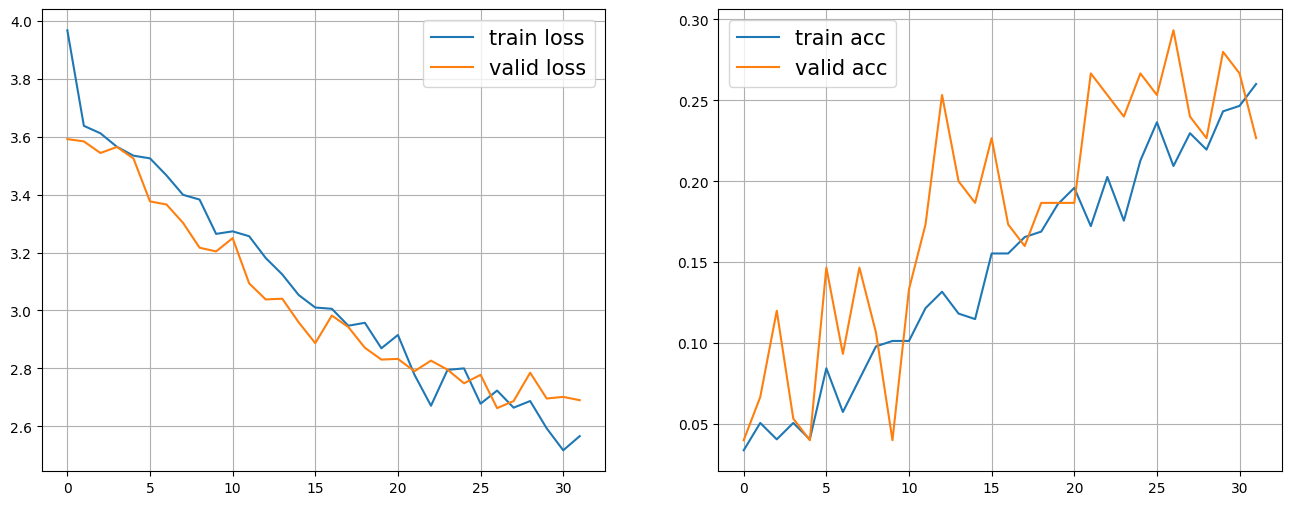

In [43]:
# plot loss and acc
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend(fontsize=15);

In [44]:
model.evaluate(test_batches, verbose=2)

20/20 - 2s - 75ms/step - accuracy: 0.1646 - loss: 3.2466


[3.246613025665283, 0.16455696523189545]

In [45]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Show all rows (optional)
pd.set_option('display.max_rows', None)

# Set column width (optional, useful for very long names)
pd.set_option('display.max_colwidth', None)



# Your list of minifigure names
characters = ['SPIDER-MAN', 'VENOM', 'AUNT MAY', 'GHOST SPIDER', 'YODA',
              'LUKE SKYWALKER', 'R2-D2', 'MACE WINDU', 'GENERAL GRIEVOUS',
              'KYLO REN', 'THE MANDALORIAN', 'CARA DUNE', 'KLATOOINIAN RAIDER 1',
              'KLATOOINIAN RAIDER 2', 'MYSTERIO', 'FIREFIGHTER', 'HARRY POTTER',
              'RON WEASLEY', 'BLACK WIDOW', 'YELENA BELOVA', 'TASKMASTER',
              'CAPTAIN AMERICA', 'OUTRIDER 1', 'OUTRIDER 2', 'OWEN GRADY',
              'TRACKER TRAQUEUR RASTREADOR', 'IRON MAN MK 1', 'IRON MAN MK 5',
              'IRON MAN MK 41', 'IRON MAN MK 50', 'JANNAH', 'HAN SOLO',
              'DARTH VADER', 'ANAKIN SKYWALKER', 'EMPEROR PALPATINE',
              'OBI-WAN KENOBI', 'BOBA FETT']

# Mapping ID <-> name
id_to_name = {i: name for i, name in enumerate(characters)}

# Collect actual labels
y_true = []
for i in range(len(test_batches)):
    batch_x, batch_y = test_batches[i]
    y_true.extend(batch_y)
y_true = np.array(y_true)

# Model predictions
predictions = model.predict(test_batches)
y_pred = np.argmax(predictions, axis=1)

# Construct table
df_pred = pd.DataFrame({
    'pred_class_id': y_pred,    # predicted
    'actual_class_id': y_true   # actual
})

# Map IDs to minifigure name
df_pred['pred_name'] = df_pred['pred_class_id'].map(id_to_name)
df_pred['actual_name'] = df_pred['actual_class_id'].map(id_to_name)

# Optional: add correctness column
df_pred['correct'] = df_pred['pred_class_id'] == df_pred['actual_class_id']

print(df_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step
    pred_class_id  actual_class_id             pred_name  \
0              29                1        IRON MAN MK 50   
1               4                4                  YODA   
2              16               19          HARRY POTTER   
3               7                7            MACE WINDU   
4              12               19  KLATOOINIAN RAIDER 1   
5               6               20                 R2-D2   
6              16               16          HARRY POTTER   
7              30               31                JANNAH   
8              35               33        OBI-WAN KENOBI   
9              17               19           RON WEASLEY   
10             13               13  KLATOOINIAN RAIDER 2   
11              7               14            MACE WINDU   
12             30               24                JANNAH   
13              4                4                  YODA   
14             30               18                JANNAH   